In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
student = pd.read_csv('ex2data1.txt' , names= ['firstExam' , 'secondExam' , 'admissionStatus'])

In [103]:
student.head()

,firstExam,secondExam,admissionStatus
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


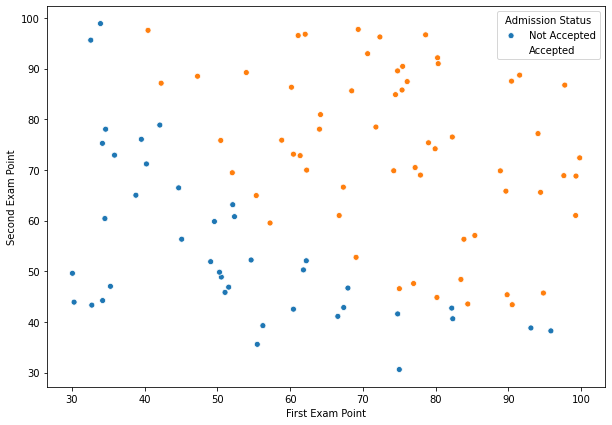

In [104]:
plt.figure(figsize=(10 , 7 ))
sns.scatterplot(x = 'firstExam' , y = 'secondExam' , data = student  , hue = 'admissionStatus', legend= 'full' )
plt.xlabel('First Exam Point')
plt.ylabel('Second Exam Point')
plt.legend(title='Admission Status', loc='upper right', labels=['Not Accepted', 'Accepted'])
plt.show()

In [105]:
X = np.array(student[['firstExam' , 'secondExam']])
y = np.array(student['admissionStatus'])
counts_of_samples = y.size
m,n = X.shape

In [106]:
print('Number of the dataset samples is {}'.format(counts_of_samples))
print('The X matrix Shape is {} x {}'.format(m , n))
print('Number of features of this dataset is {}'.format(n))

Number of the dataset samples is 100
The X matrix Shape is 100 x 2
Number of features of this dataset is 2


In [107]:
def sigmoid(x):
    
    x = np.array(x)

    g = 1 / (1 + np.exp(-x))
    
    return g

In [108]:
print('The Value of the sigmoid(0) is {}'.format(sigmoid(0)))

The Value of the sigmoid(0) is 0.5


In [109]:
X = np.concatenate([np.ones((len(X), 1)), X], axis= 1)

In [110]:
def cost_function(theta , X , y):
    
    m = y.size
    
    J = 0
    
    h = sigmoid(np.dot(X , theta.T))
    
    J = (-1 / m) * np.sum(np.dot(y , np.log(h)) +  np.dot( 1 - y , np.log(1 - h) ))
    
    return J

In [111]:
theta = np.array([-22, 0.22, 0.22])
J = cost_function( theta , X , y )
print(' The value of the cost function with these theta is {}'.format(J))

 The value of the cost function with these theta is 0.9454444389703008


In [112]:
def gradian_decent( theta , X , y ) : 
    
    m = y.size
    
    new_theta = np.zeros(theta.shape)
    
    h = sigmoid(np.dot(X , theta.T))
    
    new_theta = 1 / m * np.dot((h - y) , X) 
    
    return new_theta

In [116]:
from scipy import optimize

In [117]:
options= {"maxiter": 500, "disp": True}

In [118]:
initial_theta = np.zeros(n+1)

In [119]:
result = optimize.minimize(cost_function , initial_theta , (X ,y) , method = 'TNC' , jac = gradian_decent , options= options)

In [120]:
print('The best cost function value is {:.4}'.format(result.fun))
print('The Optimized thetas is {}'.format(result.x))
best_theta = result.x

The best cost function value is 0.2035
The Optimized thetas is [-25.16131865   0.20623159   0.20147149]


In [121]:
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

In [122]:
plot_y = (-1 / best_theta[2] ) * (best_theta[1] * plot_x + best_theta[0])

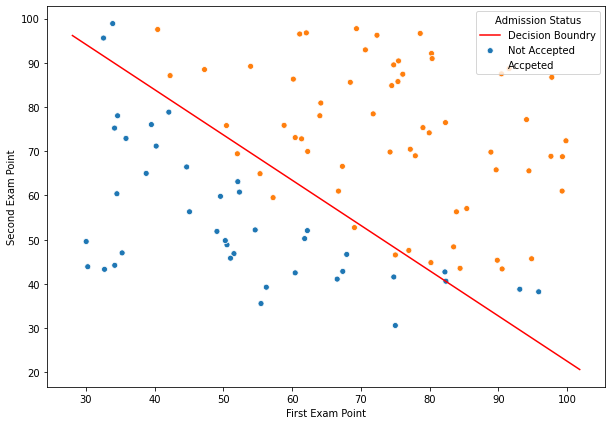

In [123]:
plt.figure(figsize=(10 , 7 ))
sns.scatterplot(x = 'firstExam' , y = 'secondExam' , data = student  , hue = 'admissionStatus', legend= 'full' )
sns.lineplot( x = plot_x , y = plot_y , color = 'red')
plt.xlabel('First Exam Point')
plt.ylabel('Second Exam Point')
plt.legend(title='Admission Status', loc='upper right', labels=['Decision Boundry', 'Not Accepted' , 'Accpeted'])
plt.show()

In [124]:
def predict( theta , X ):
    
    number_of_samples= X.shape[0]
    predicted= np.zeros(number_of_samples)
    
    predicted = np.round(sigmoid(np.dot(X , best_theta.T))) # threshold of the np.round is 0.5
    
    return predicted

In [125]:
predicted = predict( best_theta , X )

In [126]:
student['predictedAdmissionStatus'] = predicted

In [135]:
student['predictedAdmissionStatus'] = student['predictedAdmissionStatus'].astype(int)

In [136]:
student.head()

,firstExam,secondExam,admissionStatus,predictedAdmissionStatus
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1


In [131]:
def accuray(df , predicted_col_name , real_anwser_col_name):
    
    counts_of_diffrence = len(df[df[real_anwser_col_name] != df[predicted_col_name]])
    
    accuracy = 100 - counts_of_diffrence * 100 / len(df) 
    
    
    
    print('The accuracy is {} %'.format(accuracy))

In [132]:
accuray(student , 'predictedAdmissionStatus' , 'admissionStatus')

The accuracy is 89.0 %
